In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
td=pd.read_csv('mini-project-1/datasets/train/train_emoticon.csv')
vd=pd.read_csv('mini-project-1/datasets/valid/valid_emoticon.csv')

In [2]:
td.columns

Index(['input_emoticon', 'label'], dtype='object')

In [3]:
y=td.label
X=td['input_emoticon']
yv=vd.label
Xv=vd['input_emoticon']

In [4]:
X.head()

0    😛🛐😻😑😣🙠🙯🚼😒🙼😑🙯😣
1    🛐😑😪😛🚼🙯😣🚅😑🙯😹😣🙼
2    😛🙯😑🚡😣🚼🛐🙲😣🙯🛑😑🙼
3    😛🚼🛐🙐😣🙯😑🙪😑🙼🛆😣🙯
4    🛐🚟🚼😛🙋😑😣🙯😹🙯😑😣🙼
Name: input_emoticon, dtype: object

In [5]:
#Xf=map(lambda s:list(s),X)
Xf=[[ord(emoji) for emoji in emoji_string] for emoji_string in X]
Xvf=[[ord(emoji) for emoji in emoji_string] for emoji_string in Xv]

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xf)
Xv_scaled = scaler.fit_transform(Xvf)
X_scaled

array([[-0.96958781,  1.45208433, -0.56437315, ..., -1.16315689,
         0.5612915 , -0.81709817],
       [ 1.44409773, -1.1039098 , -0.79046956, ..., -0.43194295,
        -0.8258827 ,  0.80468233],
       [-0.96958781,  0.15401401, -1.12296428, ...,  2.34667004,
        -1.15442396,  0.80468233],
       ...,
       [ 1.60412108, -1.1039098 , -0.25847801, ...,  0.55519588,
        -0.8258827 , -1.14509872],
       [-0.86290558, -1.1039098 , -0.98996639, ...,  2.03590411,
        -0.8258827 ,  0.80468233],
       [-0.96958781, -0.86303077,  1.15129959, ...,  1.43265261,
         0.5612915 ,  0.80468233]])

In [7]:
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [8]:
percentages = [20, 40, 60, 80, 100]
accuracies = []

In [9]:
for percent in percentages:
    n_samples = int(len(X_scaled) * percent / 100)

    x_train_subset =X_scaled[:n_samples]
    y_train_subset = y[:n_samples]

    svm_model = SVC(C=1, kernel='linear')  # C is the regularization parameter
    print(f"Training with {percent}% of data ({n_samples} samples)") # for debugging
    svm_model.fit(x_train_subset, y_train_subset)

    predicted_labels = svm_model.predict(Xv_scaled)

    accuracy = accuracy_score(yv, predicted_labels)
    print(f"Accuracy with {percent}% training data: {accuracy:.2f}") # for debugging
    accuracies.append(accuracy)

Training with 20% of data (1416 samples)
Accuracy with 20% training data: 0.57
Training with 40% of data (2832 samples)
Accuracy with 40% training data: 0.59
Training with 60% of data (4248 samples)
Accuracy with 60% training data: 0.59
Training with 80% of data (5664 samples)
Accuracy with 80% training data: 0.60
Training with 100% of data (7080 samples)
Accuracy with 100% training data: 0.59


Accuracy with 20% training data: 0.57
Accuracy with 40% training data: 0.59
Accuracy with 60% training data: 0.59
Accuracy with 80% training data: 0.60
Accuracy with 100% training data: 0.59


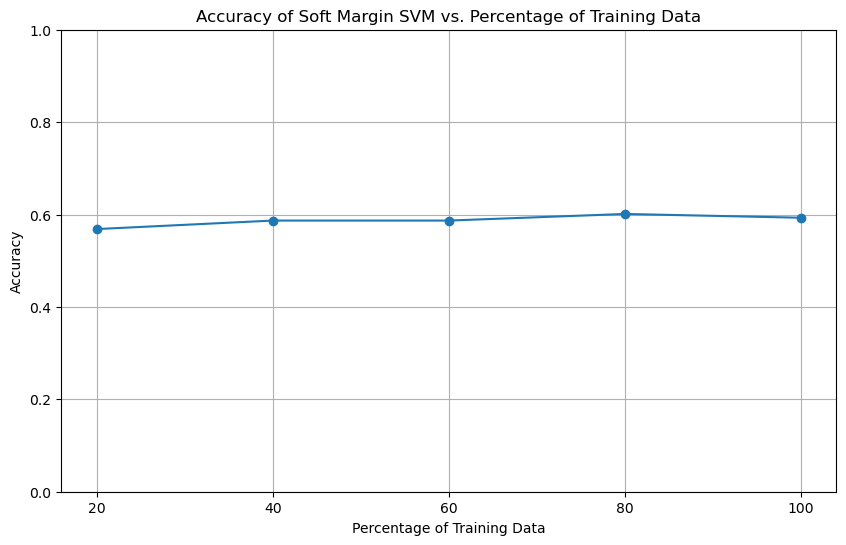

In [10]:
for percent, accuracy in zip(percentages, accuracies):
    print(f"Accuracy with {percent}% training data: {accuracy:.2f}")

plt.figure(figsize=(10, 6))
plt.plot(percentages, accuracies, marker='o')
plt.title('Accuracy of Soft Margin SVM vs. Percentage of Training Data')
plt.xlabel('Percentage of Training Data')
plt.ylabel('Accuracy')
plt.xticks(percentages)
plt.ylim(0, 1)
plt.grid()
plt.show()

In [11]:
yv

0      1
1      1
2      0
3      0
4      1
      ..
484    1
485    0
486    0
487    0
488    0
Name: label, Length: 489, dtype: int64

In [12]:
predicted_labels

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,

In [13]:
c=0
for i in range(489):
    if predicted_labels[i]==yv[i]:
        c+=1

In [14]:
c

290

In [15]:
291/489

0.5950920245398773

In [16]:
svm_model.support_vectors_.shape[0]

6472